## Functions from his code

In [633]:
# importing the wisconsin cancer dataset

import sklearn.datasets

bunch = sklearn.datasets.load_breast_cancer(as_frame=True)
data = bunch['data']
target = bunch['target']

Eigenvalues of Hessian Matrix:[0.36964774 3.93040976]
[[3.96888221]
 [3.06840879]]
[[3.96888221]
 [3.06840879]]


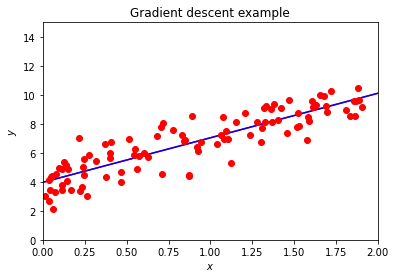

In [634]:
#gradient descent example

# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
# Hessian matrix
H = (2.0/n)* X.T @ X
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

beta_linreg = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_linreg)
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 1000

for iter in range(Niterations):
    gradient = (2.0/n)*X.T @ (X @ beta-y)
    beta -= eta*gradient

print(beta)
xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(beta)
ypredict2 = xbnew.dot(beta_linreg)
plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example')
plt.show()

Eigenvalues of Hessian Matrix:[0.38022061 4.196598  ]
[[3.92139099]
 [3.02893186]]
[[3.92130826]
 [3.02900298]]


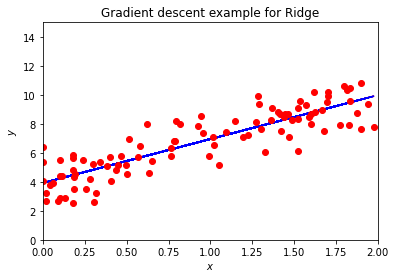

In [635]:
#gradient descent with ridge

from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys

# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X

#Ridge parameter lambda
lmbda  = 0.001
Id = n*lmbda* np.eye(XT_X.shape[0])

# Hessian matrix
H = (2.0/n)* XT_X+2*lmbda* np.eye(XT_X.shape[0])
# Get the eigenvalues
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")


beta_linreg = np.linalg.inv(XT_X+Id) @ X.T @ y
print(beta_linreg)
# Start plain gradient descent
beta = np.random.randn(2,1)

eta = 1.0/np.max(EigValues)
Niterations = 100

for iter in range(Niterations):
    gradients = 2.0/n*X.T @ (X @ (beta)-y)+2*lmbda*beta
    beta -= eta*gradients

print(beta)
ypredict = X @ beta
ypredict2 = X @ beta_linreg
plt.plot(x, ypredict, "r-")
plt.plot(x, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Gradient descent example for Ridge')
plt.show()

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


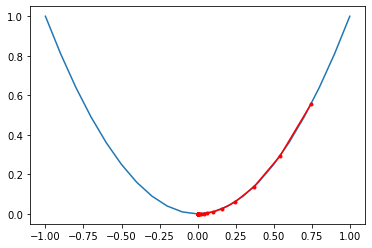

In [636]:
# gradient descent with momentum

from numpy import asarray
from numpy import arange
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot
 
# objective function
def objective(x):
	return x**2.0
 
# derivative of objective function
def derivative(x):
	return x * 2.0
 
# gradient descent algorithm
def gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = step_size * gradient + momentum * change
		# take a step
		solution = solution - new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]
 
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

Own inversion
[[4.08805934]
 [2.86802426]]
Eigenvalues of Hessian Matrix:[0.26504701 4.42519896]
theta from own gd
[[4.08805934]
 [2.86802426]]
theta from own sdg
[[4.10653666]
 [2.86499207]]


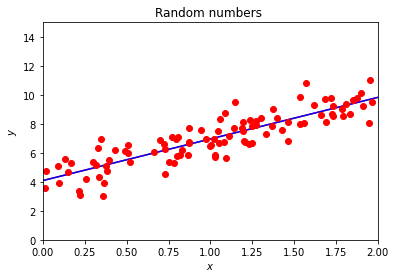

In [637]:
#code adding stochastic gradient descent

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]
XT_X = X.T @ X
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
# Hessian matrix
H = (2.0/n)* XT_X
EigValues, EigVectors = np.linalg.eig(H)
print(f"Eigenvalues of Hessian Matrix:{EigValues}")

theta = np.random.randn(2,1)
eta = 1.0/np.max(EigValues)
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n*X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = Xnew.dot(theta)
ypredict2 = Xnew.dot(theta_linreg)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
# Can you figure out a better way of setting up the contributions to each batch?
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (2.0/M)* xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

In [638]:
# Using Autograd to calculate gradients using AdaGrad and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    # The outer product is calculated from scratch for each epoch
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Calculate the outer product of the gradients
        Giter +=gradients @ gradients.T
	# Simpler algorithm with only diagonal elements
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
        # compute update
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own AdaGrad")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]
theta from own AdaGrad
[[2.00000112]
 [2.99999156]
 [4.00000829]]


In [639]:
# Using Autograd to calculate gradients using RMSprop and Stochastic Gradient descent
# OLS example
from random import random, seed
import numpy as np
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad

# Note change from previous example
def CostOLS(y,X,theta):
    return np.sum((y-X @ theta)**2)

n = 10000
x = np.random.rand(n,1)
y = 2.0+3*x +4*x*x# +np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x*x]
XT_X = X.T @ X
theta_linreg = np.linalg.pinv(XT_X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)


# Note that we request the derivative wrt third argument (theta, 2 here)
training_gradient = grad(CostOLS,2)
# Define parameters for Stochastic Gradient Descent
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
# Guess for unknown parameters theta
theta = np.random.randn(3,1)

# Value for learning rate
eta = 0.01
# Value for parameter rho
rho = 0.99
# Including AdaGrad parameter to avoid possible division by zero
delta  = 1e-8
for epoch in range(n_epochs):
    Giter = np.zeros(shape=(3,3))
    for i in range(m):
        random_index = M*np.random.randint(m)
        xi = X[random_index:random_index+M]
        yi = y[random_index:random_index+M]
        gradients = (1.0/M)*training_gradient(yi, xi, theta)
	# Previous value for the outer product of gradients
        Previous = Giter
	# Accumulated gradient
        Giter +=gradients @ gradients.T
	# Scaling with rho the new and the previous results
        Gnew = (rho*Previous+(1-rho)*Giter)
	# Taking the diagonal only and inverting
        Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
	# Hadamard product
        update = np.multiply(Ginverse,gradients)
        theta -= update
print("theta from own RMSprop")
print(theta)

Own inversion
[[2.]
 [3.]
 [4.]]
theta from own RMSprop
[[1.99999996]
 [3.00000021]
 [3.9999998 ]]


In [640]:
# to implement: SGD with ADAM!

# Code for Neural Networks

All the codes are presented in weeke 41 jupyternotebook

In [641]:
class NeuralNetwork:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons=50,
            n_categories=10,
            epochs=10,
            batch_size=100,
            eta=0.1,
            lmbd=0.0):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons
        self.n_categories = n_categories

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd

        self.create_biases_and_weights()
        
    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons, self.n_categories)
        self.output_bias = np.zeros(self.n_categories) + 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = sigmoid(self.z_h)

        self.z_o = np.matmul(self.a_h, self.output_weights) + self.output_bias

        exp_term = np.exp(self.z_o)
        self.probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = sigmoid(z_h)

        z_o = np.matmul(a_h, self.output_weights) + self.output_bias
        
        exp_term = np.exp(z_o)
        probabilities = exp_term / np.sum(exp_term, axis=1, keepdims=True)
        return probabilities

    def backpropagation(self):
        error_output = self.probabilities - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * self.a_h * (1 - self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        probabilities = self.feed_forward_out(X)
        return np.argmax(probabilities, axis=1)

    def predict_probabilities(self, X):
        probabilities = self.feed_forward_out(X)
        return probabilities

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()



In [648]:
# logistic regression (?) from week 39

import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 0.5 * (np.tanh(x / 2.) + 1)

def logistic_predictions(weights, inputs):
    # Outputs probability of a label being true according to logistic model.
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights):
    # Training loss is the negative log-likelihood of the training labels.
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([True, True, False, True])

# Define a function that returns gradients of training loss using Autograd.
training_gradient_fun = grad(training_loss)

# Optimize weights using gradient descent.
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))


Initial loss: 2.772588722239781
Trained loss: 1.067270675787016


## Our own code

In [1406]:
# Importing various packages
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import time
from sklearn.preprocessing import StandardScaler
import random
import seaborn as sns

In [1407]:
# function that does gradient descent with fixed learning rate

def gradient_descent(X, y, eta, n_its):

    # initialize betas randomly
    beta = np.random.randn(np.shape(X)[1],1)

    for iter in range(n_its):
        gradient = X.T @ (X @ beta-y)
        beta -= eta*gradient

    return beta

In [1408]:
# function that does gradient descent for OLS

def gradient_descent_linreg(X, y, n_its):

    # initialize betas randomly
    beta = np.random.randn(np.shape(X)[1],1)

    # compute the hessian
    H = X.T @ X
    EigValues, EigVectors = np.linalg.eig(H)
    eta = 1/np.max(EigValues)

    for iter in range(n_its):
        gradient = X.T @ (X @ beta-y)
        beta -= eta*gradient

    return beta

In [1409]:
# function that does gradient descent for ridge

def gradient_descent_ridge(X, y, lam, n_its):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)

    # compute the hessian
    H = (X.T @ X) + 2 * lam * np.eye(X.shape[1])
    EigValues, EigVectors = np.linalg.eig(H)
    eta = 1/np.max(EigValues)

    for iter in range(n_its):
        gradient = X.T @ (X @ (beta)-y)+2*lam*beta
        beta -= eta*gradient

    return beta

In [1410]:
# function that does gradient descent with momentum

def gradient_descent_with_momentum(X, y, eta, delta, n_its):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    change=0

    for iter in range(n_its):
        gradient = X.T @ (X @ (beta)-y)
        new_change = eta*gradient + delta*change
        beta -= new_change
        change = new_change
        gradient_before = gradient

    return beta

In [1411]:
def gradient_descent_with_adagrad(X, y, eta, delta, rho):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho*Previous+(1-rho)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [1412]:
def stochastic_gradient_descent(X, y, eta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):

        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            beta -= eta*gradients

    return beta

In [1413]:
def stochastic_gradient_descent_with_adagrad(X, y, eta, delta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Giter += gradients @ gradients.T
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Giter)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [1414]:
def stochastic_gradient_descent_with_rmsprop(X, y, eta, delta, rho, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho*Previous+(1-rho)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gradients)

    return beta

In [1415]:
def stochastic_gradient_descent_with_adam(X, y, eta, delta, rho1, rho2, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],1)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):
        Giter = np.zeros(shape=(X.shape[1],X.shape[1]))
        previous = np.zeros(shape=(X.shape[1],1))
        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = xi.T @ ((xi @ beta)-yi)
            gnew = (rho1*previous+(1-rho1)*gradients)
            previous = gnew
            Previous = Giter
            Giter += gradients @ gradients.T
            Gnew = (rho2*Previous+(1-rho2)*Giter)
            Ginverse = np.c_[eta/(delta+np.sqrt(np.diagonal(Gnew)))]
            beta -= np.multiply(Ginverse,gnew)

    return beta

In [ ]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z)*(1-sigmoid(z))

def ReLU(x):
    return np.maximum(x,0)

def ReLU_gradient(x):
    if x>0: return 1
    else: return 0

def leakyReLU(x):
    if x>=0:
        return x
    else:
        return 0.01*x

def leakyReLU_gradient(x):
    if x>0: return 1
    else: return 0.01

def linear(x):
    return x

def linear_gradient(x):
    return np.ones(np.shape(x))

def regression_cost_gradient(ypred, yreal):
    return (2 / ypred.shape[0]) * (yreal - ypred)

#def classification_error(ypred, yreal):

In [1416]:
# creating a class for Neural Networks (for regression)

class NeuralNetwork_regr:
    def __init__(
            self,
            X_data,
            Y_data,
            n_hidden_neurons=50,
            epochs=10,
            batch_size=100,
            eta=0.01,
            lmbd=0.0):

        self.X_data_full = X_data
        self.Y_data_full = Y_data

        self.n_inputs = X_data.shape[0]
        self.n_features = X_data.shape[1]
        self.n_hidden_neurons = n_hidden_neurons

        self.epochs = epochs
        self.batch_size = batch_size
        self.iterations = self.n_inputs // self.batch_size
        self.eta = eta
        self.lmbd = lmbd

        self.create_biases_and_weights()
    def create_biases_and_weights(self):
        self.hidden_weights = np.random.randn(self.n_features, self.n_hidden_neurons)
        self.hidden_bias = np.zeros(self.n_hidden_neurons) + 0.01

        self.output_weights = np.random.randn(self.n_hidden_neurons,1)
        self.output_bias = 0.01

    def feed_forward(self):
        # feed-forward for training
        self.z_h = np.matmul(self.X_data, self.hidden_weights) + self.hidden_bias
        self.a_h = ReLU(self.z_h)

        self.z_o = np.matmul(self.a_h,self.output_weights) + self.output_bias

    def feed_forward_out(self, X):
        # feed-forward for output
        z_h = np.matmul(X, self.hidden_weights) + self.hidden_bias
        a_h = ReLU(z_h)

        z_o = np.matmul(a_h,self.output_weights) + self.output_bias
        
        return z_o

    def backpropagation(self):
        error_output = self.z_o - self.Y_data
        error_hidden = np.matmul(error_output, self.output_weights.T) * np.vectorize(ReLU_gradient)(self.a_h)

        self.output_weights_gradient = np.matmul(self.a_h.T, error_output)
        self.output_bias_gradient = np.sum(error_output, axis=0)

        self.hidden_weights_gradient = np.matmul(self.X_data.T, error_hidden)
        self.hidden_bias_gradient = np.sum(error_hidden, axis=0)

        if self.lmbd > 0.0:
            self.output_weights_gradient += self.lmbd * self.output_weights
            self.hidden_weights_gradient += self.lmbd * self.hidden_weights

        self.output_weights -= self.eta * self.output_weights_gradient
        self.output_bias -= self.eta * self.output_bias_gradient
        self.hidden_weights -= self.eta * self.hidden_weights_gradient
        self.hidden_bias -= self.eta * self.hidden_bias_gradient

    def predict(self, X):
        return self.feed_forward_out(X)

    def train(self):
        data_indices = np.arange(self.n_inputs)

        for i in range(self.epochs):
            for j in range(self.iterations):
                # pick datapoints with replacement
                chosen_datapoints = np.random.choice(
                    data_indices, size=self.batch_size, replace=False
                )

                # minibatch training data
                self.X_data = self.X_data_full[chosen_datapoints]
                self.Y_data = self.Y_data_full[chosen_datapoints]

                self.feed_forward()
                self.backpropagation()

In [1476]:
# our code
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

epochs = 100
batch_size = 20

dnn = NeuralNetwork_regr(Xtrain, ytrain, eta=0.001, lmbd=0, epochs=epochs, batch_size=batch_size, n_hidden_neurons = 50)
dnn.train()
test_predict = dnn.predict(Xtest)
mse(test_predict,ytest)

0.019743266246973732

In [1417]:
def logistic_regression_sgd(X, y, eta, n_epochs, size_minibatch):

    # initialize betas randomly
    beta = np.random.randn(X.shape[1],)
    m = int(X.shape[0]/size_minibatch)

    for epoch in range(n_epochs):

        for i in range(m):
            random_index = size_minibatch * np.random.randint(m)
            xi = X[random_index:random_index + size_minibatch]
            yi = y[random_index:random_index + size_minibatch]
            gradients = (np.squeeze(sigmoid(xi @ beta))-yi) @ xi
            beta -= eta*gradients

    return beta

In [1419]:
class NeuralNetwork:

    def __init__(self, input_size):

        self._input_size = input_size      
        self.layers = list()

    def add_layer(self, layer):

        # Compute number of inputs the layer will be receiving to init weights
        n_inputs = self._input_size
        if len(self.layers) > 0:
            n_inputs = self.layers[-1].get_size()
        layer.init_weights(n_inputs)
        
        # Add layer
        self.layers.append(layer)

    def feed_forward(self, input):

        # Runs through the network once with a given list of inputs and returns the data for each layer for training

        # Process from layer to layer sequentially, passing the output of each layer into the next
        tmp = input
        a_h = [input]
        z_h = [input]

        for layer in self.layers:
            # Activate the layer
            tmp, z = layer.forward(tmp)
            z_h.append(z)
            a_h.append(tmp)
        
        return a_h, z_h

    def feed_forward_out(self, input):
        
        # Runs through the network once with a given list of inputs and returns the obtained outputs

        # Process from layer to layer sequentially, passing the output of each layer into the next
        tmp = input

        for layer in self.layers:
            # Activate the layer
            tmp, z = layer.forward(tmp)
            
        return tmp

    def train(self, input, target, learning_rate = 0.02, its = 100, regularization = 0):

        # Trains by performing feed forward and back propagation

        for i in range(its):
            # Feed forward once to obtain outputs
            a_h, z_h = self.feed_forward(input)
            
            # Compute errors & gradient descent for each layer
            # Going backwards from last to first layer

            """

            Backpropagation

            error_output = self.z_o - self.Y_data
            error_hidden = np.matmul(error_output, self.output_weights.T) * np.vectorize(ReLU_gradient)(self.a_h)
            """

            prev_layer_err = np.multiply(regression_cost_gradient(target, a_h[-1]), self.layers[-1]._afn_d(z_h[-1]))

            for j in range(len(self.layers)-1, -1, -1):
                prev_activation_fn_d = self.layers[j-1 if j > 0 else 0]._afn_d
                prev_layer_err = self.layers[j].backward(a_h[j], z_h[j], prev_layer_err, prev_activation_fn_d, learning_rate, regularization)

In [1420]:
class Layer():

    def __init__(self, size, activation_function, activation_function_d):
        """
            Initialises the layer with a custom activation function
            Parameters:
                size (int): Number of nodes in the hidden layer
                activation_function: The activation function to use for the layer
                activation_function_d: The first derivative of the activation function
        """
        self._size = size
        self._afn = activation_function
        self._afn_d = activation_function_d
        self._weights = None
        self._biases = np.ones((self._size, 1)) * 0.01

    def get_size(self):
        return self._size

    def init_weights(self, input_size):

        # Initialises the weights array for the layer with stochastic noise
        # The size corresponding to the number of nodes in the previous layer

        self._weights = np.random.randn(self._size, input_size)
        

    def forward(self, input):
        # Runs through the layer once with a given list of inputs and returns the outputs obtained with and without activation
        z = (self._weights @ input.T + self._biases).T
        return self._afn(z), z

    def backward(self, activated_input, input, error, prev_activation_fn_d, learning_rate, regularization):
        
        #Gradient descent to optimize the layer

        # Compute gradients

        weights_gradient = (error.T @ activated_input) + regularization * self._weights

        bias_gradient = np.sum(error, axis=0, keepdims=True).T + regularization * self._biases
        
        # Adjust weights and biases
        self._weights -= learning_rate * weights_gradient
        self._biases -= learning_rate * bias_gradient

        # Return the estimated error in inputs
        return np.multiply((error @ self._weights), prev_activation_fn_d(input))

In [1510]:
n = 1000
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)
X = np.c_[np.ones((n,1)), x, x**2]

In [1519]:
l1 = Layer(50, sigmoid, sigmoid_gradient)
l2 = Layer(1, linear, linear_gradient)
nn = NeuralNetwork(3)
nn.add_layer(l1)
nn.add_layer(l2)
nn.train(X, y, learning_rate=0.005, regularization=0.1, its=100)
mse(nn.feed_forward_out(X),y)

1.0026350445868941

In [1424]:
dnn = MLPRegressor(hidden_layer_sizes=(50,),learning_rate_init=0.2)
dnn.fit(X,y)
test_predict = dnn.predict(X)
mse(test_predict,y)

c:\Users\dalma\anaconda3\envs\uni\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.01174539443487183

In [1425]:
n = 100
random.seed(6)

x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

Text(0.5, 1.0, 'Comparing GD with and without momentum')

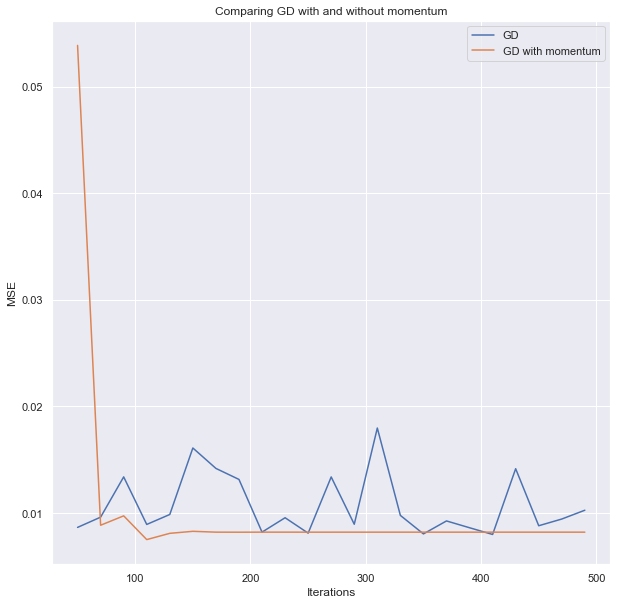

In [1426]:
n_its_list = np.arange(50,510,20)
eta=0.015

MSE1_list = []
MSE2_list = []

for n_its in n_its_list:
    betas1 = gradient_descent(Xtrain, ytrain, eta, n_its)
    betas2 = gradient_descent_with_momentum(Xtrain,ytrain,eta,delta=0.9,n_its=n_its)
    MSE1_list.append(mse(ytest,Xtest @ betas1))
    MSE2_list.append(mse(ytest,Xtest @ betas2))

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="GD")
plt.plot(n_its_list,MSE2_list,label="GD with momentum")
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing GD with and without momentum")
#plt.savefig("Comparing GD with and without momentum.png")

Text(0.5, 1.0, 'GD changing momentum parameter')

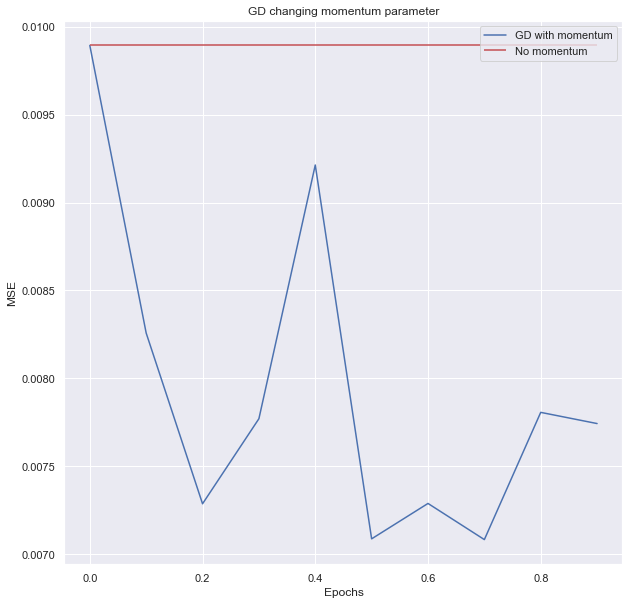

In [1427]:
# gd with momentum delta

n = 100
random.seed(6)

x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 200
eta=0.015
delta_list = np.arange(0,1,0.1)

MSE_list = {delta:0 for delta in delta_list}

for delta in delta_list:

    betas = gradient_descent_with_momentum(Xtrain, ytrain, eta, delta=delta, n_its=n_its)

    MSE_list[delta] = mse(ytest,Xtest @ betas)

fig = plt.figure(figsize = (10,10))
plt.plot(delta_list,MSE_list.values(),label="GD with momentum")
plt.hlines(MSE_list[0],min(delta_list),max(delta_list),label="No momentum",color='r')
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("GD changing momentum parameter")
#plt.savefig("GD changing momentum parameter.png")


Text(0.5, 1.0, 'Comparing GD and SGD')

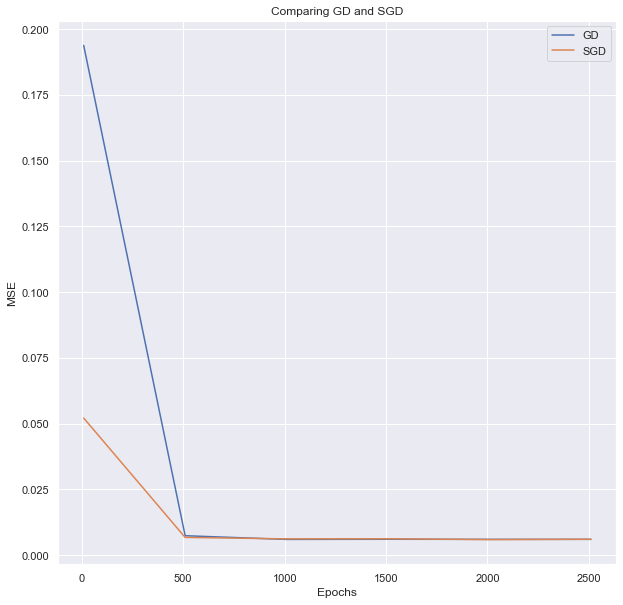

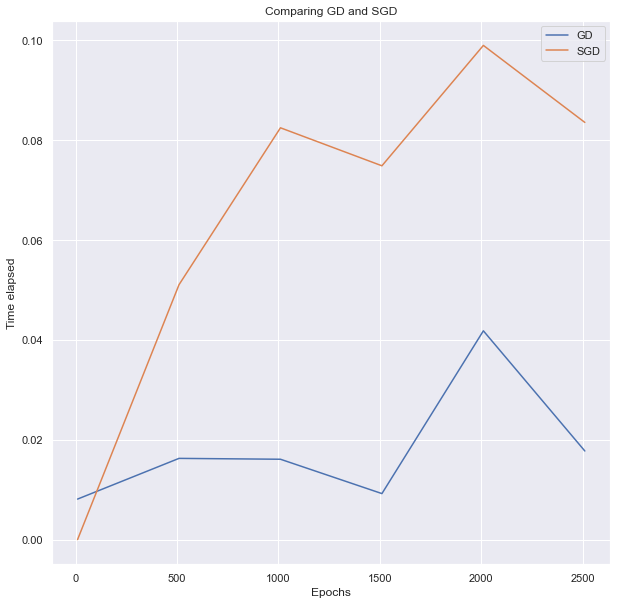

In [1428]:
# GD e SGD

n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(10,3010,500)
eta=0.015
MSE1_list = []
MSE2_list = []
time1_list = []
time2_list = []

for n_its in n_its_list:
    t = time.time()
    betas1 = gradient_descent(Xtrain, ytrain, eta, n_its)
    time1_list.append(time.time()-t)
    t = time.time()
    betas2 = stochastic_gradient_descent(Xtrain,ytrain,eta,n_its,20)
    time2_list.append(time.time()-t)
    MSE1_list.append(mse(ytest,Xtest @ betas1))
    MSE2_list.append(mse(ytest,Xtest @ betas2))

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="GD")
plt.plot(n_its_list,MSE2_list,label="SGD")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing GD and SGD")
#plt.savefig("Comparing GD and SGD.png")

fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,time1_list,label="GD")
plt.plot(n_its_list,time2_list,label="SGD")
plt.xlabel("Epochs")
plt.ylabel("Time elapsed")
plt.legend()
plt.title("Comparing GD and SGD")
#plt.savefig("Comparing GD and SGD.png")

In [1430]:
# comparing different learning rate methods

n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(500,3500,500)
eta=0.015
MSE1_list = np.zeros(len(n_its_list))
MSE2_list = np.zeros(len(n_its_list))
MSE3_list = np.zeros(len(n_its_list))
MSE4_list = np.zeros(len(n_its_list))


for i in range(len(n_its_list)):

    n_its = n_its_list[i]

    betas1 = stochastic_gradient_descent(Xtrain,ytrain,eta,n_its,20)
    betas2 = stochastic_gradient_descent_with_adagrad(Xtrain,ytrain,eta, 0.9 ,n_its, 20)
    betas3 = stochastic_gradient_descent_with_adam(Xtrain,ytrain,eta, 0.9, 0.9, 0.99,n_its,20)
    betas4 = stochastic_gradient_descent_with_rmsprop(Xtrain,ytrain,eta, 0.9, 0.9,n_its,20)

    MSE1_list[i] = (mse(ytest,Xtest @ betas1))
    MSE2_list[i] = (mse(ytest,Xtest @ betas2))
    MSE3_list[i] = (mse(ytest,Xtest @ betas3))
    MSE4_list[i] = (mse(ytest,Xtest @ betas4))

Text(0.5, 1.0, 'Comparing learning rate adapting methods')

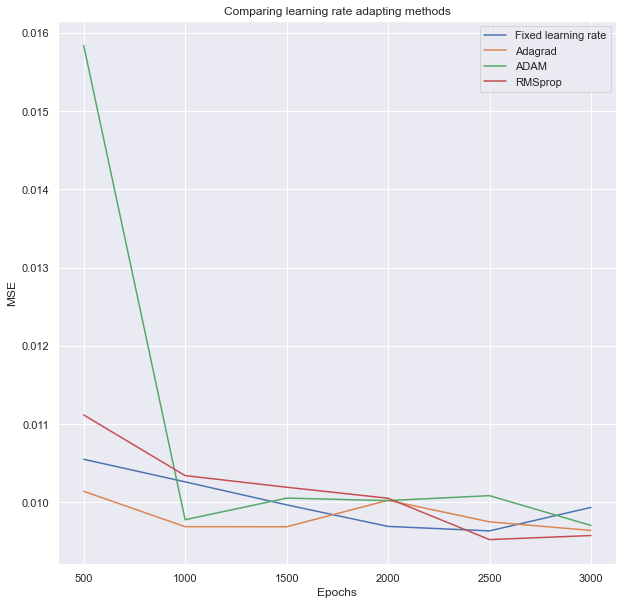

In [1431]:
fig = plt.figure(figsize = (10,10))
plt.plot(n_its_list,MSE1_list,label="Fixed learning rate")
plt.plot(n_its_list,MSE2_list,label="Adagrad")
plt.plot(n_its_list,MSE3_list,label="ADAM")
plt.plot(n_its_list,MSE4_list,label="RMSprop")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.title("Comparing learning rate adapting methods")
#plt.savefig("Comparing learning rate adapting methods.png")

In [1432]:
#gridsearch (batch size, learning rate)

batch_sizes = [1,5,10,20,50]
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]

MSE = np.zeros((len(batch_sizes), len(eta_list)))

for i in range(len(batch_sizes)):
    batch_size = batch_sizes[i]
    for j in range(len(eta_list)):
        eta = eta_list[j]
        betas = stochastic_gradient_descent(X,y,eta,100,batch_size)
        MSE[i,j] =  mse(ytest,Xtest @ betas)

Text(0.5, 1.0, 'MSE grid search for learning rate and batch size')

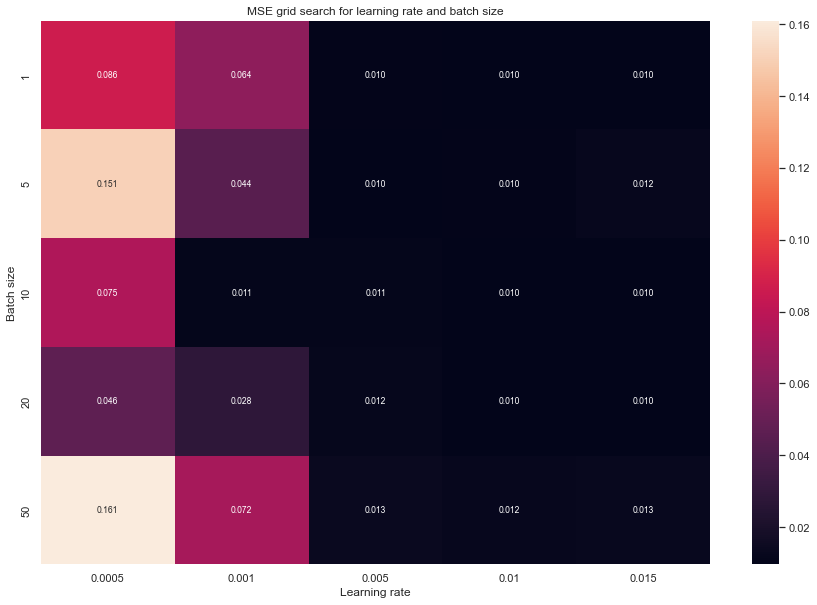

In [1433]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE, xticklabels=eta_list, yticklabels=batch_sizes, annot=True,annot_kws={"size": 8.5}, fmt=".3f")
plt.xlabel("Learning rate")
plt.ylabel("Batch size")
plt.title("MSE grid search for learning rate and batch size")
#plt.savefig("Grid search for learning rate and batch size.png")

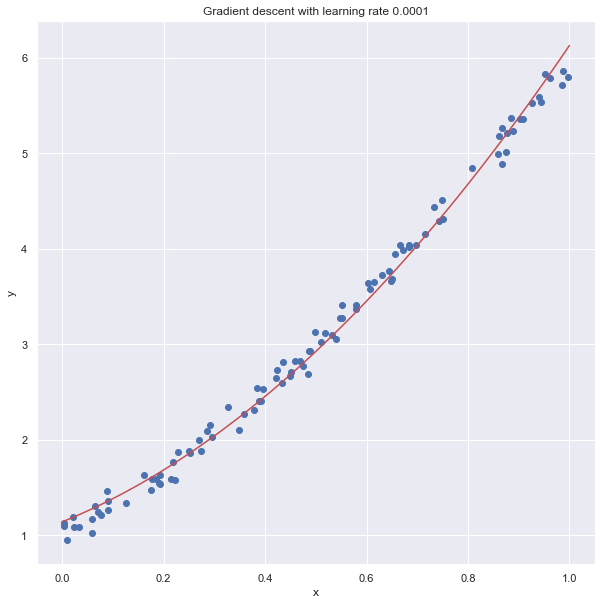

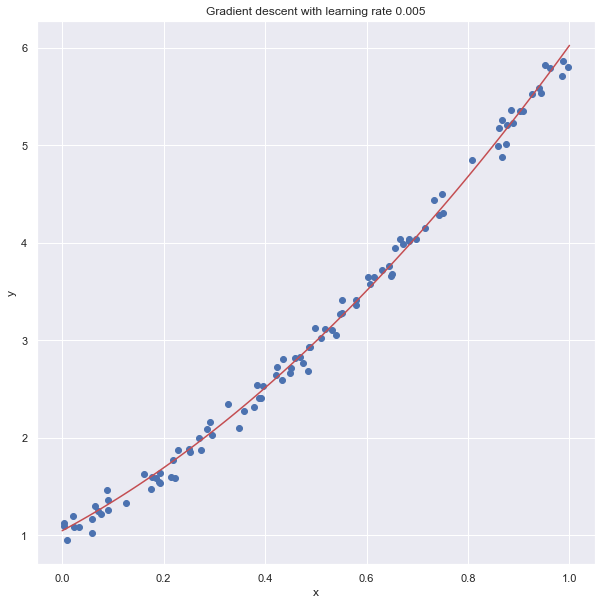

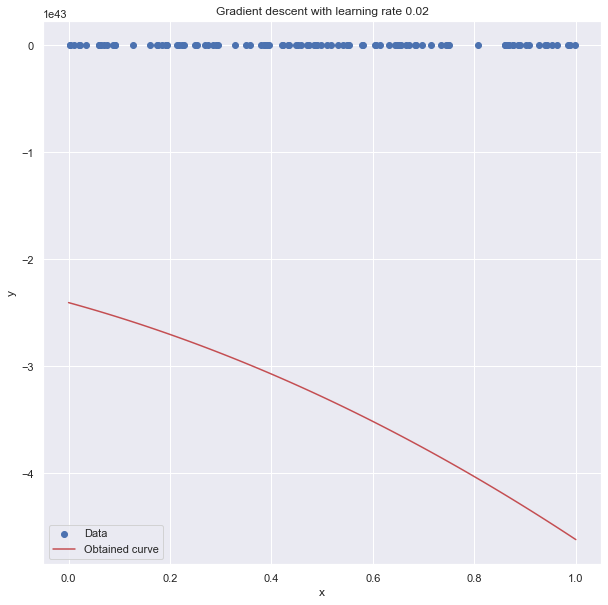

In [1434]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)


X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its = 500
eta_list = [0.0001, 0.005, 0.02]

for eta in eta_list:
    betas = gradient_descent(Xtrain, ytrain, eta, n_its)
    ypred = Xtest @ betas

    fig = plt.figure(figsize = (10,10))
    plt.scatter(x,y,label="Data")
    plt.plot(x_lins, betas[0] + betas[1]*x_lins + betas[2]*x_lins**2, 'r',label="Obtained curve")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Gradient descent with learning rate " + str(eta))
plt.legend()

Text(0.5, 0, 'Iterations')

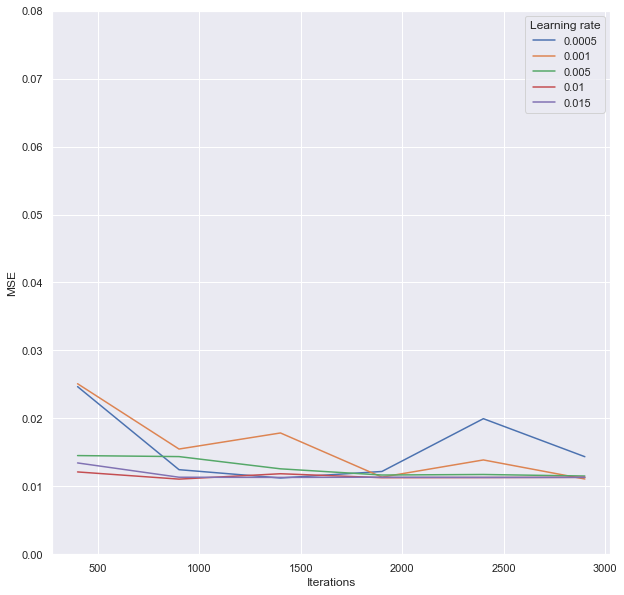

In [1435]:
n = 100
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

x_lins = np.linspace(0,1,100)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

n_its_list = np.arange(400,3001,500)
eta_list = [0.0005, 0.001, 0.005, 0.01, 0.015]
MSE = np.zeros((len(n_its_list),len(eta_list)))

for i in range(len(n_its_list)):
    for j in range(len(eta_list)):
        
        n_its = n_its_list[i]
        eta = eta_list[j]

        betas = gradient_descent(Xtrain, ytrain, eta, n_its)
        ypred = Xtest @ betas
        MSE[i][j] = mse(ytest,ypred)

fig = plt.figure(figsize = (10,10))
for j in range(len(eta_list)):
    plt.plot(n_its_list,MSE[:,j], label = str(eta_list[j]))
plt.legend(title ="Learning rate")
plt.ylim((0,0.08))
plt.ylabel("MSE")
plt.xlabel("Iterations")
#plt.savefig("epochs_eta_mse_gradient_descent.png")

Text(0.5, 1.0, 'MSE grid search for learning rate and epochs')

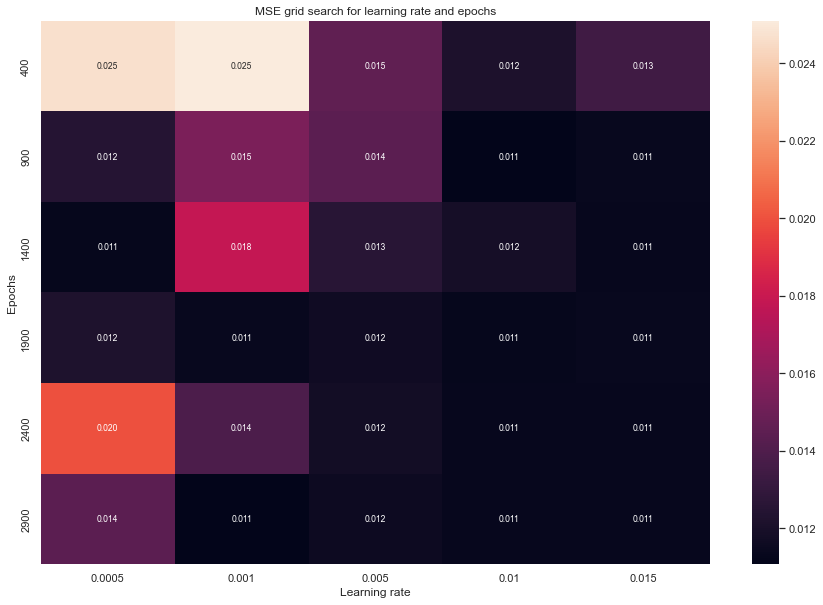

In [1436]:
plt.figure(figsize=(15,10))
sns.heatmap(MSE, xticklabels=eta_list, yticklabels=n_its_list, annot=True, annot_kws={"size": 8.5}, fmt=".3f")
plt.xlabel("Learning rate")
plt.ylabel("Epochs")
plt.title("MSE grid search for learning rate and epochs")
#plt.savefig("Grid search for learning rate and epochs.png")

Text(0, 0.5, 'Beta0')

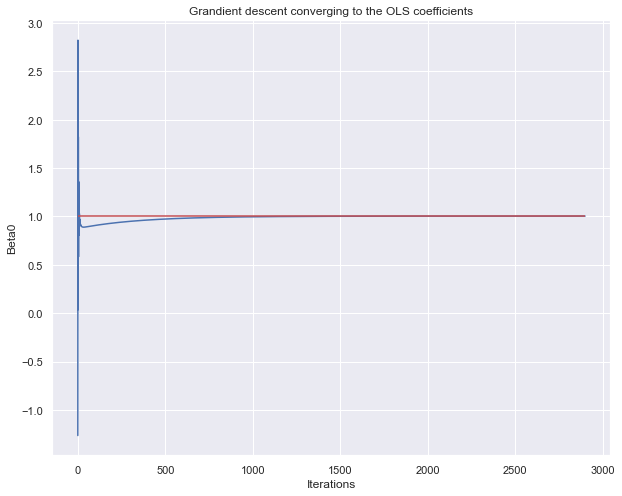

In [1437]:
OLSbetas = np.linalg.inv(Xtrain.T @ Xtrain) @ Xtrain.T @ ytrain
betas = np.zeros((np.shape(X)[1],n_its+1))

# initialize betas randomly
betas[:,0] = np.squeeze(np.random.randn(np.shape(X)[1],1))
eta = 0.015

for iter in range(n_its):
    gradient = Xtrain.T @ (Xtrain @ betas[:,iter]-ytrain.T).T
    betas[:,iter+1] = betas[:,iter] - eta*gradient.T

fig = plt.figure(figsize = (10,8))
plt.plot(range(n_its+1), betas[0,:])
plt.hlines(OLSbetas[0],0,n_its,'r')
plt.title("Grandient descent converging to the OLS coefficients")
plt.xlabel("Iterations")
plt.xlabel("Iterations")
plt.ylabel("Beta0")
#plt.savefig("gradient_descent_converge_OLS.png")

In [1438]:
# regression neural network with keras

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function

In [1439]:
n = 200
x = np.random.rand(n,1)
y = 1+3*x+2*x**2+0.1*np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [1440]:
# keras/tensorflow

model = Sequential()
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(Xtrain,ytrain,epochs=100,verbose=0)
model.evaluate(Xtest,ytest)

2/2 [==============================] - 0s 8ms/step - loss: 0.0094


0.009358787909150124

In [1442]:
# scikit-learn

from sklearn.neural_network import MLPRegressor

dnn = MLPRegressor(hidden_layer_sizes=(50,),learning_rate_init=0.2)
dnn.fit(Xtrain,ytrain)
test_predict = dnn.predict(Xtest)
mse(test_predict,ytest)

c:\Users\dalma\anaconda3\envs\uni\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.038473540987996754

In [1443]:
def ReLU(x):
    return np.maximum(x,0)

def ReLU_gradient(x):
    if x>0: return 1
    else: return 0

def leakyReLU(x):
    if x>=0:
        return x
    else:
        return 0.01*x

def leakyReLU_gradient(x):
    if x>0: return 1
    else: return 0.01

In [1445]:
# logistic regression

#from sklearn.neural_network import MLPClassifier

#dnn = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic',alpha=lmbd, learning_rate_init=eta, max_iter=epochs)

In [1446]:
bunch = sklearn.datasets.load_breast_cancer(as_frame=True)
data = np.array(bunch['data'])
target = np.array(bunch['target'])

betas = logistic_regression_sgd(data, target, 0.01, 400, 50)
ypred = sigmoid(data @ betas)>0.5
sum(target == ypred)/np.shape(data)[0]

C:\Users\dalma\AppData\Local\Temp\ipykernel_26760\3799409807.py:2: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0+np.exp(-z))


0.9121265377855887

## Joao

In [1541]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import pickle

from sklearn.model_selection import train_test_split

class Model:
    """
        Feed-forward neural network instance
        Can add layers to the network with add_layer
    """
    
    def __init__(self, input_size: int, cost_function, random_state: int = int(time())):
        """
            Artificial neural network class
            Parameters:
                input_size (int): Size of the input layer (i.e. number of features), which will determine the number of weights in the first hidden layer
                random_state (int): Seed value to use for RNG
        """

        self._input_size = input_size

        self.random_state = random_state
        self.rng = np.random.default_rng(np.random.MT19937(seed=self.random_state))
        
        self.layers = list()
        self.cost_function = cost_function
        self._has_output = False
        
    

    def add_layer(self, layer: Layer):
        """
            Adds a layer to the Model class.
            It has to have at least one OutputLayer.
            The layers must be added by the order they act.
        """

        # Ensure no more than 1 output layer
        if self._has_output:
            print('\033[91mCannot add another layer after the network\'s output layer! Make sure layers are being added in the correct order.\033[0m')
            return

        # Compute number of inputs the layer will be receiving to init weights
        n_inputs = self._input_size
        if len(self.layers) > 0:
            n_inputs = self.layers[-1].get_size()
        layer.init_weights(n_inputs, self.rng)
        
        # Add layer
        self.layers.append(layer)
        if isinstance(layer, OutputLayer):
            self._has_output = True # Locks the layers array to prevent adding more after the output layer


    def feed_forward(self, inputs: np.matrix, training: bool = False) -> tuple:
        """
            Runs through the network once with a given list of inputs and returns the obtained outputs
            Parameters:
                inputs (np.matrix|list<float>): The set of inputs to give to the network
                training (bool): If true, will return hidden layer activations alongside the actual outputs
            Returns:
                (np.matrix|list<float>): Outputs obtained out of the output layer after running through all layers, returned only if `training` was `false`
                (list<np.matrix>): Hidden layer activated outputs, returned only if `training` was `true`
                (list<np.matrix>): Hidden layer outputs (no activation function), returned only if `training` was `true`
        """

        # If the input is given as a 1D array, we're wanting to use that as a single row in the input matrix (i.e. run with a single set of input data)
        output_list = False
        if isinstance(inputs, list):
            inputs = np.matrix([inputs])
            output_list = True
        
        if inputs.ndim == 1:
            inputs = np.matrix(inputs)

        # Process from layer to layer sequentially, passing the output of each layer into the next
        tmp = inputs
        if training:
            a_h = [inputs]
            z_h = [inputs]
        for layer in self.layers:

            # Activate the layer
            tmp, z = layer.forward(tmp)

            # If for whatever reason some kind of error occured, the output of forward() will be null
            if tmp is None:
                print('\033[91mLayer gave invalid results; see above for details regarding the error.\033[0m')
                return None
            
            # In training, keep track of hidden layer outputs
            if training:
                z_h.append(z)
                a_h.append(tmp)
        
        # Output of final layer = output of network
        if output_list:
            tmp = tmp[0] # Output as a list if the input was given as such
        if training:
            return a_h, z_h
        return tmp

    def error(self, inputs: np.matrix, targets: np.matrix) -> float:
        """
            Feeds forward once, then returns the mean squared error between targets and outputs
            Parameters:
                inputs (np.matrix): Inputs to run the network on
                targets (np.matrix): Expected outputs
            Returns:
                (float): Mean squared error after prediction
        """
        return self.cost_function.error_nn(targets, self.feed_forward(inputs))


    def back_prop(self, inputs: np.matrix, targets: np.matrix, learning_rate: float = 0.1, regularization: float = 0):
        """
            Back-propagates once with a set of actual and desired outputs, so the next run will match the targets closer (hopefully)
            Parameters:
                inputs (np.matrix): Inputs to train for
                targets (np.matrix): Desired outcome values
                learning_rate (float): Learning rate η to use to update the weights & biases
                regularization (float): Regularization parameter λ to control rate of descent
            Returns:
                (bool): Whether the back-propagation succeeded
        """

        # Iterate over list of inputs/targets if passing more than 1
        for i in range(inputs.shape[0]):
            ins = np.matrix(inputs[i])
            targs = np.matrix(targets[i])

            # Feed forward once to obtain outputs
            a_h, z_h = self.feed_forward(ins, training=True)

            # Dimensionality check
            if a_h[-1].shape != targs.shape or a_h[-1].shape[1] != self.layers[len(self.layers) - 1].get_size():
                print('\033[91mMismatching outputs/targets size; should be (x,', self.layers[len(self.layers) - 1].get_size(), '), got', a_h[-1].shape, 'and', targs.shape, 'instead..\033[0m')
                return False
            
            # Compute errors & gradient descent for each layer
            # Going backwards from last to first layer
            prev_layer_err = np.multiply(self.cost_function.grad_C_nn(targs, a_h[-1]), self.layers[-1]._activation_fn.d(z_h[-1]))
            for j in range(len(self.layers)-1, -1, -1): # for (let i = len(self.layers) - 1; i >= 0; --i)       (python is fucking garbage)
                # Update layer
                prev_activation_fn = self.layers[j-1 if j > 0 else 0]._activation_fn
                prev_layer_err = self.layers[j].backward(a_h[j], z_h[j], prev_layer_err, prev_activation_fn, learning_rate, regularization)
        return True
    

    def train(self, inputs: np.matrix, targets: np.matrix, initial_learning_rate: float = 0.1, final_learning_rate: float = None, sgd: bool = True, epochs: int = 1000, minibatch_size: int = 5, regularization: float = 0, testing_inputs: np.matrix = None, testing_targets: np.matrix = None, verbose: bool = True, return_errs: bool = False) -> tuple:
        """
            Back-propagates over a series of epochs using stochastic gradient descent
            Parameters:
                inputs (np.matrix): Inputs to train for
                targets (np.matrix): Desired outcome values
                initial_learning_rate (float): Learning rate at epoch = 0
                final_learning_rate (float|None|bool): Learning rate at epoch = max_epochs; if passing None, will keep learning rate constant; if passing True, the learning rate will be /10 anytime a plateau is reached
                sgd (bool): Whether to use stochastic gradient descent or plain old gd
                epochs (int): Number of training epochs to train over
                minibatch_size (int): Size of individual mini-batches
                regularization (float): Regularization parameter λ to control rate of descent
                testing_inputs (np.matrix): If not None, will compute the error/accuracy score for the test set at each epoch
                testing_targets (np.matrix): If not None, will compute the error/accuracy score for the test set at each epoch
                verbose (bool): Whether to output the completion percentage to stdout
                return_errs (bool): If true, returns a list of error values as a function of epoch
            Returns:
                (float): Final training error obtained by the network after the last training iteration
                (float): Final testing error obtained by the network after the last training iteration; only returned if testing_inputs and testing_targets are passed
                (np.ndarray): List of training errors, only given if return_errs is given as True
        """

        # number of mini-batches
        if sgd:
            minibatch_count = int(inputs.shape[0] / minibatch_size)

        # learning_schedule will be either a constant or decay from initial_learning_rate to final_learning_rate over the course of the epochs
        learning_schedule = lambda epoch: initial_learning_rate
        if final_learning_rate is not None and final_learning_rate is not True and final_learning_rate != initial_learning_rate:
            t0 = initial_learning_rate * final_learning_rate / (initial_learning_rate - final_learning_rate) * epochs
            t1 = final_learning_rate / (initial_learning_rate - final_learning_rate) * epochs
            learning_schedule = lambda epoch: t0 / (t1 + epoch)

        # go over epochs
        errs = np.ndarray(epochs)
        for i, epoch in enumerate(range(1, epochs + 1)):

            # Eta will either always be the same, or go from initial_ to final_learning_rate over the epochs
            eta = learning_schedule(epoch-1)
            
            # Permute data each epoch
            perm = self.rng.permuted(np.arange(0, inputs.shape[0]))
            inputs = inputs[perm, :]
            targets = targets[perm, :]

            # Go through all minibatches in the input set
            if sgd:
                for m in range(minibatch_count):
                    idx = minibatch_size * int(self.rng.random() * minibatch_count)
                    ins = inputs[idx : idx + minibatch_size]
                    targs = targets[idx : idx + minibatch_size]
                    
                    if not self.back_prop(ins, targs, learning_rate=eta, regularization=regularization):
                        return # An error occured
            else:
                if not self.back_prop(inputs, targets, learning_rate=eta, regularization=regularization):
                    return # An error occured
            
            # Compute error/accuracy
            err = self.error(inputs, targets)
            errs[i] = err
            if verbose:
                print(f"[ Epoch: {epoch}/{epochs}; " + self.cost_function.error_name() + f": {err} ]")
                if testing_inputs is not None and testing_targets is not None:
                    print(f"\t\tTesting " + self.cost_function.error_name() + f": {self.error(testing_inputs, testing_targets)}")
                if np.isnan(err):
                    print('\033[91mEncountered a NaN value while training!\033[0m')
                    return None
            
            # Adaptive learning rate if needed
            if final_learning_rate == True and i > 10:
                earlier = errs[i-10]
                n = 0
                for j in range(0, 9):
                    if errs[i-j] > earlier:
                        n += 1
                if n > 4:
                    initial_learning_rate /= 2

        print()
        train_error = self.error(inputs, targets)
        print(f"[ Finished training with " + self.cost_function.error_name() + f": {train_error} ]")
        if testing_inputs is not None and testing_targets is not None:
            test_error = self.error(testing_inputs, testing_targets)
            print(f"\t\tTesting " + self.cost_function.error_name() + f": {test_error}")
            if return_errs:
                return train_error, test_error, errs
            return train_error, test_error
        if return_errs:
            return train_error, errs
        return train_error

In [1542]:
class Layer():
    """
        Abstract class that can be inherited to define two different types of Layers (hidden and output).
    """

    def __init__(self, size: int, activation_function, initial_bias: float = 1e-3, initial_weights: list = None):
        """
            Initialises the layer with a custom activation function
            Parameters:
                size (int): Number of nodes in the hidden layer
                activation_function (ActivationFunction): The activation function to use for the layer
                initial_bias (float): Initial value to initialize the bias to, typically zero or a small value (see https://cs231n.github.io/neural-networks-2/)
                initial_weights (list|None): The endpoints to use for the weights distribution; should be a list of size 2
        """
        self._size = size
        self._activation_fn = activation_function
        self._weights = None
        self._initial_bias = initial_bias
        self._initial_weights = initial_weights if initial_weights is not None else [-1, 1]
        self._biases = np.ones((self._size, 1)) * initial_bias

    def get_size(self) -> int:

        return self._size

    def init_weights(self, input_size: int, rng: np.random.Generator):
        """
            Initialises the weights array for the layer with stochastic noise
            The size corresponding to the number of nodes in the previous layer
            Parameters:
                input_size (int): Number of inputs the layer will be receiving, i.e. number of nodes in the previous layer
                rng (np.random.Generator): Random number generator to use when selecting initial weights
        """
        self._weights = rng.uniform(self._initial_weights[0], self._initial_weights[1], (self._size, input_size))
    
    def reset(self, rng: np.random.Generator):
        """
            Resets the weights and biases to default
            This method should not be called before init_weights is called at least once!
            Parameters:
                rng (np.random.Generator): Random number generator to use when selecting initial weights
        """
        self._biases = np.ones((self._size, 1)) * self._initial_bias
        self.init_weights(self._weights.shape[1], rng)

    def forward(self, inputs: np.matrix) -> tuple:
        """
            Runs through the layer once with a given list of inputs and returns the outputs obtained
            Parameters:
                inputs (np.matrix): Inputs to run through the nodes (must match size of weights/biases!)
            Returns:
                (np.matrix): Outputs from the different nodes - size corresponds to size of the layer
                (np.matrix): Same outputs without activation function
        """
        
        # Accumulate inputs for each node
        # Because of the way we structure the input, we need to transpose inputs and outputs :)
        z = (self._weights @ inputs.T + self._biases).T
        return self._activation_fn(z), z

    def backward(self, activated_inputs: np.matrix, inputs: np.matrix, error: np.matrix, prev_activation_fn, learning_rate: float, regularization: float) -> np.matrix:
        """
            Gradient descent to optimize the layer
            Parameters:
                activated_inputs (np.matrix): The inputs the layer receives
                inputs (np.matrix): The inputs the layer receives (no activation fn)
                error (np.matrix): Computed error estimate for the layer
                prev_activation_fn (ActivationFunction): Activation function of the previous layer (l-1)
                learning_rate (float): Learning rate η to use to update the weights & biases
                regularization (float): Regularization parameter λ to control the rate of descent
            Returns:
                (np.matrix): Weighted error in inputs, to use to train the previous layer
        """
        # Compute gradients
        # Simple gradient descent
        weights_gradient = (activated_inputs.T @ error) + regularization * self._weights.T
        bias_gradient = error + regularization * self._biases.T
        
        # Adjust weights and biases
        self._weights -= learning_rate * weights_gradient.T
        self._biases -= learning_rate * bias_gradient.T

        # Return the estimated error in inputs
        return np.multiply((error @ self._weights), prev_activation_fn.d(inputs))



# Declare Hidden and Output layer classes for nicer syntax
# The only difference between the two is the name
class HiddenLayer(Layer):
    ...

class OutputLayer(Layer):
    ...

In [1543]:
class Sigmoid():
    """
        Sigmoid activation function
    """
    
    def name(self) -> str:
        return 'Sigmoid'

    def __call__(self, x: float) -> float:
        """
            Returns the result of the sigmoid f(x)
        """
        return 1.0 / (1.0 + np.exp(-x))

    def d(self, x: float) -> float:
        """
            Returns the derivative of the sigmoid f'(x)
        """
        return np.multiply(self(x), (1.0 - self(x)))

In [1544]:
class Linear():
    """
        Linear (passthrough) activation function
        To be used as activation function for the output layer in regression problems
    """
    
    def name(self) -> str:
        return 'Linear'

    def __call__(self, x: float) -> float:
        """
            Returns x (passthrough)
        """
        return x

    def d(self, x: float) -> float:
        """
            Returns the derivative of y = x
        """
        return 1 # (careful, this is a really expensive function to run computationally! use at your own risk - might need to parallelise)

In [1545]:
class LinearRegression():
    
    def __init__(self, X_train: np.matrix, y_train: np.matrix, X_test: np.matrix, y_test: np.matrix, regularization: float = 0):
        """
            Initiates the LinearRegression class 
            Parameters
                X_train (np.matrix): design train matrix
                y_train (np.matrix): target train values
                X_test (np.matrix): design test matrix
                y_test (np.matrix): target test values
        """
        self.X = X_train
        self.y = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.n = self.y.shape[0]
        self.n_features = self.X.shape[1]
        
        self.reg = regularization
         
    def C(self, beta: np.matrix, indx: np.matrix = np.matrix([])) -> np.matrix:
        """
            Returuns the value of the cost function at a new beta values
            Parameters:
                beta (np.matrix): features vector
        """
        if indx.size == 0:
            return np.mean(np.power((self.X @ beta - self.y), 2)) + self.reg * np.linalg.norm(beta)
        return np.mean(np.power((self.X[indx] @ beta - self.y[indx]), 2)) + self.reg * np.linalg.norm(beta)

    def grad_C(self, beta: np.matrix, indx: np.matrix = np.matrix([])) -> np.matrix:
        """
            Returns the gradient of the function evaluated at a new beta values, 
            using the analytical expression.
            Parameters:
                beta (np.matrix): features vector
        """
        if indx.size == 0:
            return (2 / self.n) * self.X.T @ (self.X @ beta - self.y) + self.reg * beta
        return (2 / self.y[indx].shape[0]) * self.X[indx].T @ (self.X[indx] @ beta - self.y[indx]) + self.reg * beta
    
    def hess_C(self, beta: np.matrix) -> np.matrix:
        """
            Hessian for the cost function
        """
        return self.X.T @ self.X

    def error(self, beta: np.matrix) -> np.matrix:
        """
            Computes the MSE for the test data given the beta values.
            Parameters:
                beta (np.matrix): features vector
        """
        return np.mean((self.y_test - self.X_test @ beta)**2)

    def grad_C_nn(self, y_data: np.matrix, y_tilde: np.matrix) -> np.matrix:
        return (2 / y_tilde.shape[0]) * (y_tilde - y_data)
    
    def error_nn(self, y_data:np.matrix, y_tilde: np.matrix) -> np.matrix:
        """
            Computes the MSE for the test data given the beta values.
            Parameters:
                beta (np.matrix): features vector
        """
        return np.mean(np.multiply(y_data - y_tilde, y_data - y_tilde))
    
    def error_name(self) -> str:
        """
            Returns the string that should be associated with the error_nn values
        """
        return "Error"
    
    def perm_data(self, rng: np.random.Generator):
        """
            Permutes data for SDG
        """
        perm = rng.permuted(np.arange(0, self.n))
        self.X = self.X[perm, :]
        self.y = self.y[perm]  

In [1546]:
cost = LinearRegression(Xtrain,ytrain,Xtest,ytest)
nn = Model(3,cost,random_state=1)
layer1 = HiddenLayer(50,Sigmoid())
layer2 = OutputLayer(1,Linear())
nn.add_layer(layer1)
nn.add_layer(layer2)
nn.train(Xtrain,ytrain,testing_inputs=Xtest,testing_targets=ytest,initial_learning_rate=0.015,verbose=False)


[ Finished training with Error: 0.02350614783598101 ]
		Testing Error: 0.016973963633218448


(0.02350614783598101, 0.016973963633218448)